In [74]:
pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-06ismre6/fbprophet_abf0841ce1ac418281be9ee849e914cd/setup.py'"'"'; __file__='"'"'/tmp/pip-install-06ismre6/fbprophet_abf0841ce1ac418281be9ee849e914cd/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-f5pvj2ny/install-record.txt --single-version-externally-managed --compile --install-hea

In [75]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [77]:
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [78]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-09-18,20127.234375,20127.234375,19387.492188,19419.505859,19419.505859,31254779144
2022-09-19,19418.572266,19639.480469,18390.318359,19544.128906,19544.128906,40177002624
2022-09-20,19545.591797,19602.457031,18813.455078,18890.789062,18890.789062,36791346508


In [79]:
df.reset_index(inplace=True)
df = df[['Date', 'Adj Close']]

In [80]:
df

,Date,Adj Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
2923,2022-09-18,19419.505859
2924,2022-09-19,19544.128906
2925,2022-09-20,18890.789062
2926,2022-09-21,18547.400391


In [81]:
df.columns = ['ds', 'y']

In [82]:
df

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
2923,2022-09-18,19419.505859
2924,2022-09-19,19544.128906
2925,2022-09-20,18890.789062
2926,2022-09-21,18547.400391


In [83]:
model = Prophet()

In [84]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [85]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [86]:
df.tail()

,ds,y
2923,2022-09-18,19419.505859
2924,2022-09-19,19544.128906
2925,2022-09-20,18890.789062
2926,2022-09-21,18547.400391
2927,2022-09-22,19150.806641


In [105]:
future_dates = model.make_future_dataframe(periods=100)

In [106]:
future_dates.tail()

,ds
3023,2022-12-27
3024,2022-12-28
3025,2022-12-29
3026,2022-12-30
3027,2022-12-31


In [107]:
prediction = model.predict(future_dates)

In [108]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3023,2022-12-27,25762.586983,20365.736081,33278.140947,23915.372950,28060.904958,1057.703597,1057.703597,1057.703597,-14.806090,-14.806090,-14.806090,1072.509687,1072.509687,1072.509687,0.0,0.0,0.0,26820.290580
3024,2022-12-28,25724.979831,20785.981679,33115.677944,23799.476290,28035.983569,1144.973610,1144.973610,1144.973610,21.035827,21.035827,21.035827,1123.937783,1123.937783,1123.937783,0.0,0.0,0.0,26869.953440
3025,2022-12-29,25687.372678,20651.722425,33205.623411,23713.287176,28014.277370,1139.698607,1139.698607,1139.698607,-30.397579,-30.397579,-30.397579,1170.096187,1170.096187,1170.096187,0.0,0.0,0.0,26827.071286
3026,2022-12-30,25649.765526,21240.974624,33191.890514,23654.611305,28027.717410,1206.864253,1206.864253,1206.864253,-2.330103,-2.330103,-2.330103,1209.194356,1209.194356,1209.194356,0.0,0.0,0.0,26856.629779
3027,2022-12-31,25612.158373,20944.934551,33779.669372,23595.935433,28020.222853,1251.941790,1251.941790,1251.941790,12.425158,12.425158,12.425158,1239.516632,1239.516632,1239.516632,0.0,0.0,0.0,26864.100164


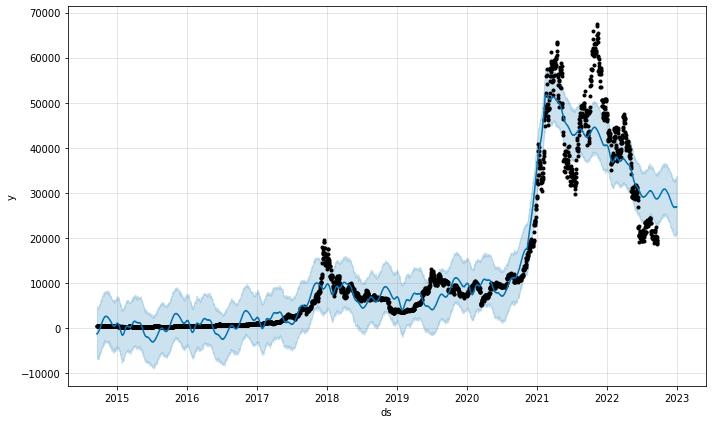

In [109]:
fig = model.plot(prediction)

In [110]:
from prophet.plot import plot_plotly
plot_plotly(model, prediction)

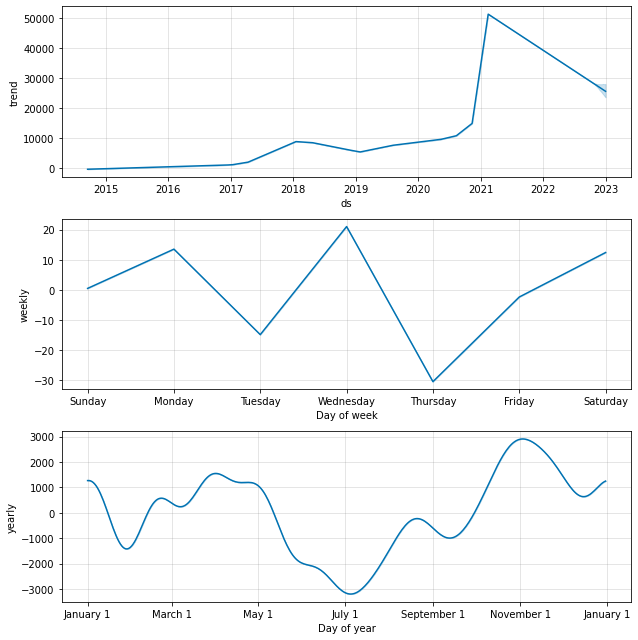

In [111]:
fig2 = model.plot_components(prediction)

In [112]:
from prophet.diagnostics import cross_validation

In [130]:
df_cv = cross_validation(model, horizon = '100 days')

INFO:prophet:Making 50 forecasts with cutoffs between 2015-09-29 00:00:00 and 2022-06-14 00:00:00


  0%|          | 0/50 [00:00<?, ?it/s]

In [131]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
4995,2022-09-18,50384.388448,42803.524084,58126.018392,19419.505859,2022-06-14
4996,2022-09-19,50353.517482,42539.527855,58001.402073,19544.128906,2022-06-14
4997,2022-09-20,50303.755244,42384.742376,57970.027673,18890.789062,2022-06-14
4998,2022-09-21,50368.094573,42152.841420,58016.936754,18547.400391,2022-06-14
4999,2022-09-22,50293.780735,42213.909370,57936.404199,19150.806641,2022-06-14


In [132]:
from prophet.diagnostics import performance_metrics

In [133]:
df_performance = performance_metrics(df_cv)

In [135]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,10 days,7.335285e+07,8564.627626,4497.970283,0.253313,0.185942,0.239677,0.328
1,11 days,7.676556e+07,8761.595515,4625.525092,0.261176,0.197121,0.247254,0.318
2,12 days,8.060289e+07,8977.911216,4784.290926,0.269491,0.206228,0.255460,0.308
3,13 days,8.499542e+07,9219.295987,4966.788711,0.279285,0.216848,0.264819,0.292
4,14 days,8.911168e+07,9439.898330,5118.056328,0.287609,0.226097,0.272872,0.276
...,...,...,...,...,...,...,...,...
86,96 days,2.151009e+08,14666.317204,8479.321856,0.500380,0.447544,0.502117,0.160
87,97 days,2.160909e+08,14700.031233,8478.974093,0.503555,0.455995,0.504171,0.160
88,98 days,2.183957e+08,14778.217057,8501.455872,0.508922,0.466515,0.507589,0.162
89,99 days,2.211206e+08,14870.125374,8533.170144,0.514779,0.481121,0.511182,0.164


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:544: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/prophet/plot.py:545: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



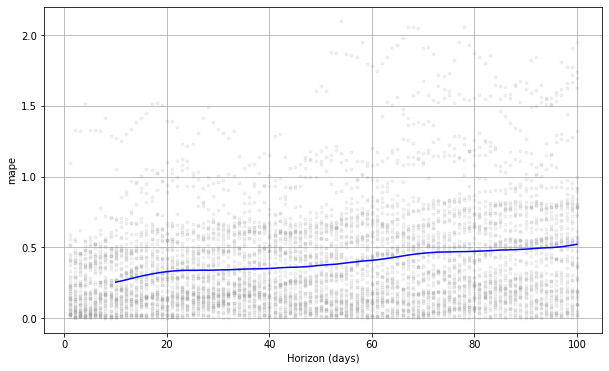

In [136]:
from prophet import plot

fig2 = plot.plot_cross_validation_metric(df_cv, metric='mape')